<a href="https://colab.research.google.com/github/Nachiaa/Employment-Wage-Trends/blob/main/6020_MOD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from flask import Flask, request, jsonify
import joblib




In [ ]:
data = pd.read_csv('imdb.csv')

In [ ]:
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
data.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
data.nunique()

,0
Poster_Link,1000
Series_Title,999
Released_Year,100
Certificate,16
Runtime,140
Genre,202
IMDB_Rating,17
Overview,1000
Meta_score,63
Director,548


In [ ]:
data["Certificate"].fillna('Unknown', inplace = True)

<ipython-input-7-06e604213e4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Certificate"].fillna('Unknown', inplace = True)


In [ ]:
data['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', 'Unknown', 'PG', 'G', 'Passed',
       'TV-14', '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG',
       'U/A'], dtype=object)

In [ ]:
#converting columns to numeric
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')
data['Runtime'] = data['Runtime'].str.replace(' min', '', regex=True).astype(float)
data['Gross'] = data['Gross'].str.replace(',', '', regex=True).astype(float)
data['Meta_score'] = pd.to_numeric(data['Meta_score'], errors='coerce')



In [ ]:
#handling missing values
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce').fillna(data['Gross'].median())
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())

In [ ]:
data.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,1
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


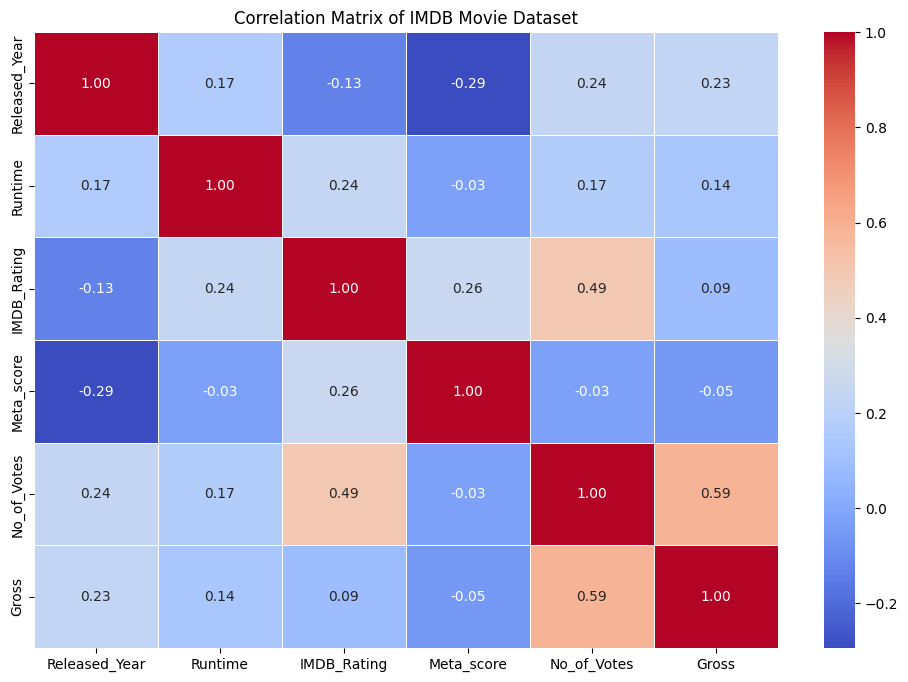

IMDB_Rating      1.000000
No_of_Votes      0.494979
Meta_score       0.258650
Runtime          0.243096
Gross            0.085518
Released_Year   -0.131053
Name: IMDB_Rating, dtype: float64


In [ ]:
#correlation matrix
correlation_matrix = data.corr(numeric_only=True)

#heatmap for correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of IMDB Movie Dataset")
plt.show()

# Display top correlations with IMDB Rating
top_correlations = correlation_matrix["IMDB_Rating"].sort_values(ascending=False)
print(top_correlations)

In [ ]:
# Feature Engineering
data['Years_Since_Release'] = 2025 - data['Released_Year']
data['Log_Votes'] = np.log1p(data['No_of_Votes'])
data['Log_Gross'] = np.log1p(data['Gross'])

In [ ]:
# Encoding categorical columns
label_encoders = {}
categorical_columns = ['Certificate', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

In [ ]:
#Data Splitting

train_data, val_data, test_data = np.split(data.sample(frac=1, random_state=42), [int(0.6 * len(data)), int(0.8 * len(data))])


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
#features and target variable selection
features = ['Released_Year', 'Runtime', 'Meta_score', 'Gross', 'No_of_Votes'] + categorical_columns
target = 'IMDB_Rating'

X_train, y_train = train_data[features], train_data[target]
X_val, y_val = val_data[features], val_data[target]
X_test, y_test = test_data[features], test_data[target]

# Standardize numerical features
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_val[features] = scaler.transform(X_val[features])
X_test[features] = scaler.transform(X_test[features])


<ipython-input-15-19fa87b9ba85>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[features] = scaler.fit_transform(X_train[features])
<ipython-input-15-19fa87b9ba85>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val[features] = scaler.transform(X_val[features])
<ipython-input-15-19fa87b9ba85>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

#XGBoost Regression

In [ ]:
# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train, y_train)

# Evaluate Regression Model on Test Set
y_test_pred = xgb_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")


Test MSE: 0.0406
Test R² Score: 0.4837
Test MAE: 0.1554


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6)
xgb_model.fit(X_train, y_train)  # Train on continuous IMDB ratings

# Predict ratings
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate regression performance
from sklearn.metrics import mean_squared_error, r2_score

print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R² Score:", r2_score(y_test, y_pred_xgb))


XGBoost MSE: 0.04079965658825448
XGBoost R² Score: 0.48151243855451953


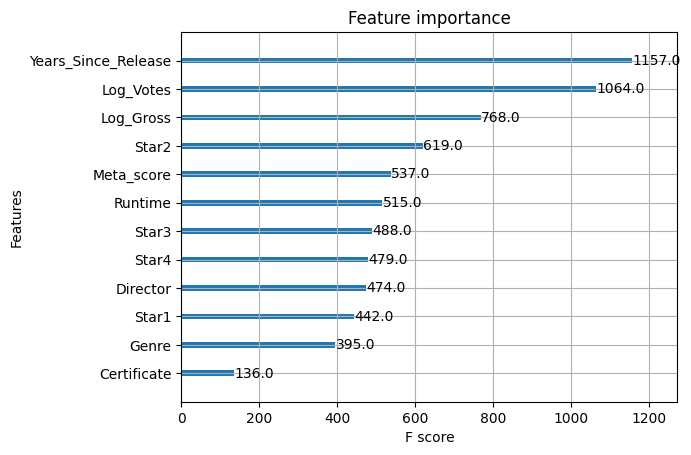

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


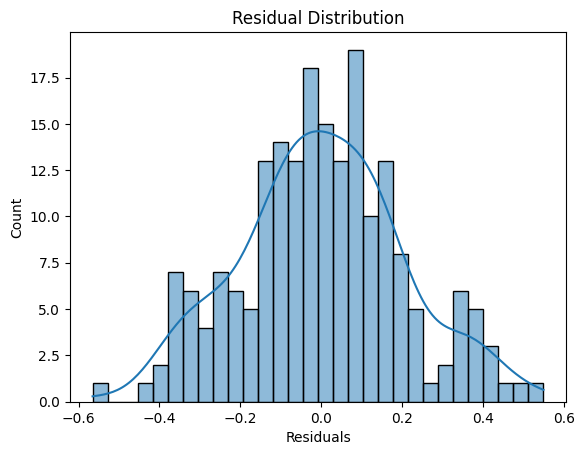

In [ ]:
# Compute residuals
residuals = y_test - y_pred_xgb

# Plot residuals
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_xgb = grid_search.best_estimator_
print("Best XGBoost Parameters:", grid_search.best_params_)

# Evaluate the optimized model
y_pred_best = best_xgb.predict(X_test)
print("Optimized XGBoost MSE:", mean_squared_error(y_test, y_pred_best))
print("Optimized XGBoost R² Score:", r2_score(y_test, y_pred_best))


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Optimized XGBoost MSE: 0.038616415805154694
Optimized XGBoost R² Score: 0.5092573581037594


In [ ]:
# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate on validation set
y_val_pred = best_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation R² Score: {val_r2:.2f}")

# Now evaluate on test set
y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R² Score: {test_r2:.2f}")


Validation MSE: 0.04
Validation R² Score: 0.43
Test MSE: 0.04
Test R² Score: 0.51


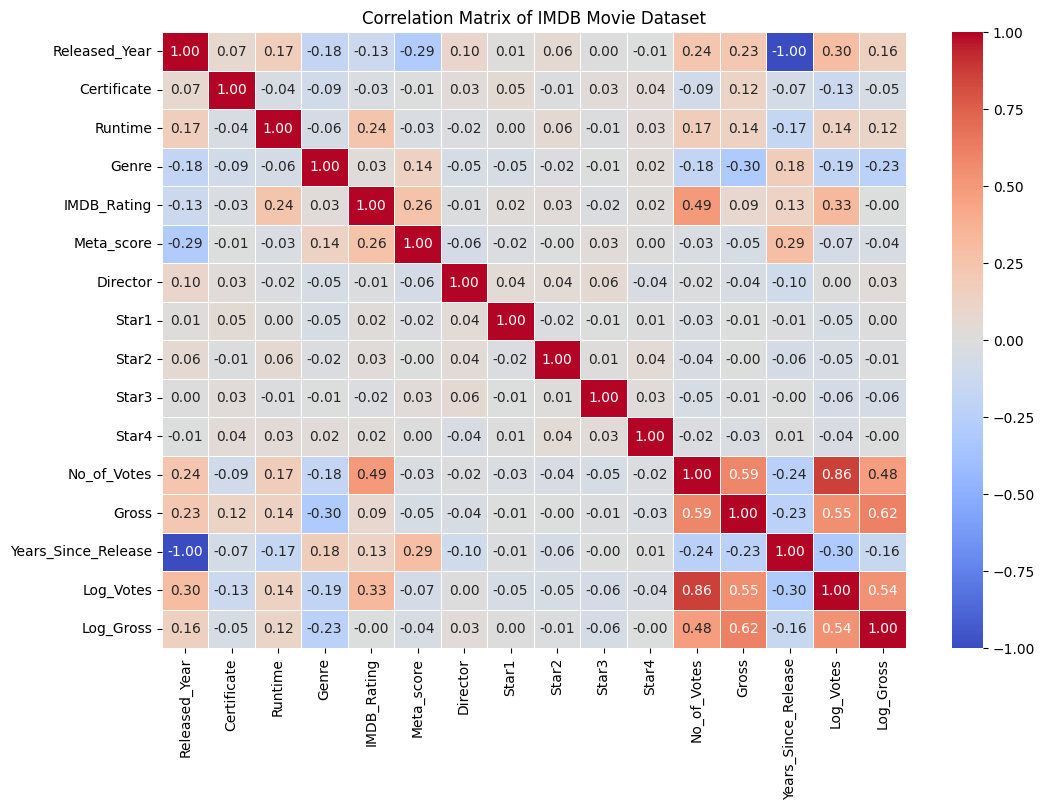

IMDB_Rating            1.000000
No_of_Votes            0.494979
Log_Votes              0.325238
Meta_score             0.258650
Runtime                0.243096
Years_Since_Release    0.131053
Gross                  0.085518
Star2                  0.029169
Genre                  0.028939
Star4                  0.023168
Star1                  0.019455
Log_Gross             -0.001547
Director              -0.011944
Star3                 -0.016579
Certificate           -0.027021
Released_Year         -0.131053
Name: IMDB_Rating, dtype: float64


In [ ]:
# Compute correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot heatmap for correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of IMDB Movie Dataset")
plt.show()

# Display top correlations with IMDB Rating
top_correlations = correlation_matrix["IMDB_Rating"].sort_values(ascending=False)
print(top_correlations)

In [ ]:

# Save model using joblib
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Deploy Model using Flask
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        input_features = np.array(data['features']).reshape(1, -1)

        # Load model and scaler
        model = joblib.load("xgboost_model.pkl")
        scaler = joblib.load("scaler.pkl")

        # Scale input data
        input_features[:, :5] = scaler.transform(input_features[:, :5])

        # Make prediction
        prediction = model.predict(input_features)
        return jsonify({"Predicted IMDB Rating": float(prediction[0])})
    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
